# **Text classification from scratch**
https://keras.io/examples/nlp/text_classification_from_scratch/

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re

**Load the data: Snappfood sentiment classification** 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Snappfood - Sentiment Analysis.csv to Snappfood - Sentiment Analysis.csv


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
comments = pd.read_csv('/content/Snappfood - Sentiment Analysis.csv',on_bad_lines='skip' , delimiter='\t')
#comments = pd.read_csv('/content/gdrive/MyDrive/eiiid/Snappfood - Sentiment Analysis.gsheet.csv',on_bad_lines='skip' , delimiter='\t')

**Prepare the data**

In [ ]:
!pip install hazm

In [5]:
comments.head(5)

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0


In [6]:
data = comments[['comment' , 'label' , 'label_id']]
data.dropna(inplace=True)

<ipython-input-6-3c5cb5b8b02c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [8]:
data['label_id'] = data['label_id'].astype(int)
data.head()

<ipython-input-8-eb5e17005692>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label_id'] = data['label_id'].astype(int)


,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [9]:
print(data.shape)
print(data.isna().sum())
data.shape

(69480, 3)
comment     0
label       0
label_id    0
dtype: int64


(69480, 3)

<BarContainer object of 2 artists>

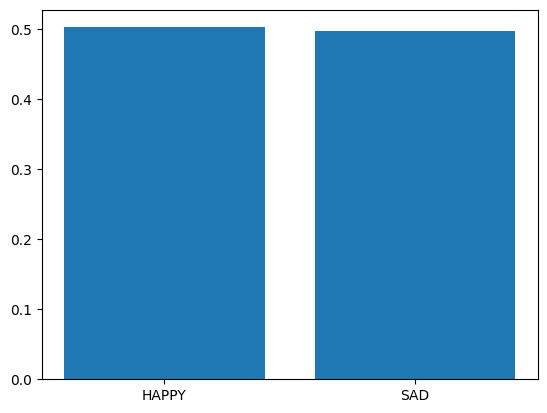

In [10]:
plt.bar(['HAPPY','SAD'], data['label'].value_counts()/data.shape[0])

In [12]:
from hazm import Normalizer,stopwords_list, word_tokenize

In [ ]:
!pip install langid

In [15]:
import langid
#Checking whether the text is Farsi
def is_farsi(text):
    lang, prob = langid.classify(text)
    return lang == 'fa'


In [16]:
#Convert Arabic letters to Persian
def convert_arabic_to_persian(text):
    arabic_to_persian_dict = {'ء': 'ء',  'أ': 'ا', 'ؤ': 'و', 'إ': 'ا', 'ئ': 'ی',  'ة': 'ه', 'ك': 'ک',  'ي': 'ی'}
    persian_text = ''
    for char in text:
        if char in arabic_to_persian_dict:
            persian_text += arabic_to_persian_dict[char]
        else:
            persian_text += char
    return persian_text

data['comment'] = data['comment'].apply(convert_arabic_to_persian)



<ipython-input-16-c3cdae4d2545>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].apply(convert_arabic_to_persian)


In [18]:
def preprocessing(text):
    
    normalizer = Normalizer()
    clean_text = re.sub("[۰-۹]", "", text)
    clean_text = re.sub("[0-9]", "", clean_text)
    cleaned_text = re.sub(r'[^\w\s]', '', clean_text)
    #Remove duplicate letters from words
    cleaned_text = re.sub(r'(.)\1+', r'\1', cleaned_text)
    output = normalizer.normalize(cleaned_text)
    return output

In [19]:
data["comment"] = data["comment"].apply(lambda x: preprocessing(x) if is_farsi(x) else x)
#data['comment'] = data['comment'].apply(preprocessing)

<ipython-input-19-ada8d80033ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment"] = data["comment"].apply(lambda x: preprocessing(x) if is_farsi(x) else x)


In [20]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stopwords_list()]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
data['comment'] = data['comment'].apply(remove_stopwords)

<ipython-input-20-91103dee679b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].apply(remove_stopwords)


In [ ]:
data.head(10)

,comment,label,label_id
0,واقعا حیف وقت بنویسم سرویس دهیتون افتضاح,SAD,1
1,قرار ساعته برسه نیم ساعت زودتر موقع چقدر پلاک ...,HAPPY,0
2,قیمت مدل اصلا کیفیتش سازگاری نداره ظاهر فریبند...,SAD,1
3,درست اندازه کیفیت امیداورم کیفیتون باشه مشتری ...,HAPPY,0
4,شیرینی وانیلی مدل,HAPPY,0
5,بدترین پیتزای خورده_بودم,SAD,1
6,منونم,HAPPY,0
7,کیفیت غذا متوسط پاین انگار داخل یه رستوران معم...,SAD,1
8,اقلام تازه روز وخیلی سریع بدستم واقعا متشکرم,HAPPY,0
9,چی هات داگ دورش کلا سوخته_بود داخلش خام,SAD,1


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers


In [ ]:
# data_train, data_test = train_test_split(data[['comment', 'label_id']], test_size=0.1)
# data_test, data_val = train_test_split(data_test, test_size=0.6)
# display(data_train.shape)
# display(data_val.shape)
# display(data_test.shape)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data['comment'].values, data['label_id'].values, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_ds = train_ds.shuffle(buffer_size=len(train_data)).batch(batch_size)

val_ds = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_ds = val_ds.batch(batch_size)

test_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_ds = test_ds.batch(batch_size)


In [ ]:
print(f"Number of batches in train_ds: {train_ds.cardinality()}")
print(f"Number of batches in val_ds: {val_ds.cardinality()}")
print(f"Number of batches in test_ds: {test_ds.cardinality()}")

Number of batches in train_ds: 1390
Number of batches in val_ds: 348
Number of batches in test_ds: 435


In [ ]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(text_batch.numpy()[i].decode('utf-8'))
        print(label_batch.numpy()[i])

پیتزا آلفردو شور پیتزا استیک
1
کیفیترین بد مزهترین بدترین پیتزای تابحال خوردم درواقع نتونستم تیکهاش بخورم بد
1
بدترین پیتزاهای خوردم مرغ اصلا سیب زمینیها خام بد
1
مشتریهای باروژ هستم نظرم کیفیت قبولی داره
0
منون خسته نباشید
0


In [ ]:
max_features = 20000
embedding_dim = 128
sequence_length = 500
vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)


In [ ]:
text_ds = train_ds.map(lambda x, y: x)
# Let's call `adapt`:
vectorize_layer.adapt(text_ds)

In [ ]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label


# Vectorize the data.
train_ds = train_ds.map(vectorize_text)
val_ds = val_ds.map(vectorize_text)
test_ds = test_ds.map(vectorize_text)

# Do async prefetching / buffering of the data for best performance on GPU.
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

***Build a model ***

In [ ]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = tf.keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
epochs = 3

# Fit the model using the train and test datasets.
model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/3
1390/1390 [==============================] - 300s 214ms/step - loss: 0.4480 - accuracy: 0.7889 - val_loss: 0.4027 - val_accuracy: 0.8213
Epoch 2/3
1390/1390 [==============================] - 297s 214ms/step - loss: 0.3448 - accuracy: 0.8517 - val_loss: 0.4220 - val_accuracy: 0.8133
Epoch 3/3
1390/1390 [==============================] - 295s 212ms/step - loss: 0.2771 - accuracy: 0.8846 - val_loss: 0.4817 - val_accuracy: 0.8023


**Evaluate the model on the test set**

In [ ]:
model.evaluate(test_ds)

435/435 [==============================] - 20s 45ms/step - loss: 0.4711 - accuracy: 0.8066


[0.4711359143257141, 0.8066350221633911]